$$\Huge{\text{DSC 521 Assingment1  1}}$$

$$\Large{\text{ Using regression to replace Nans}}$$

<font size=4>
We will look at a water quality data set and specifically the salinity over time at different sites.  Many of the time series have NANs for the column labeled "SALT ppt" Below are some of the imports that I used to complete the project.In particular we are going to estimate the vlues of FLAB11 using FLAB23.

Nolan Stelzner

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

<font size=4> First import the file Water2.xls using pandas [read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html). Use Collection date as the index column. The use pivot_table to do some data manipulation to get a time series for salt concentration(i.e. SALT ppt) for each of the sites. 

In [2]:
df = pd.read_excel('Water2.xlsx',index_col='CollectionDate')
salt=pd.pivot_table(df,index='CollectionDate',columns='Station ID',values='SALT ppt')

In [3]:
salt.head()

Station ID,FLAB01,FLAB03,FLAB05,FLAB08,FLAB09,FLAB10,FLAB11,FLAB12,FLAB13,FLAB14,FLAB15,FLAB17,FLAB18,FLAB19,FLAB23
CollectionDate,,,,,,,,,,,,,,,
1989-06-27,NaN,NaN,34.0,36.0,38.0,NaN,NaN,NaN,52.0,NaN,57.0,42.0,NaN,NaN,NaN
1989-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,46.0,38.0
1989-07-25,NaN,NaN,38.0,26.0,38.0,NaN,NaN,NaN,54.0,NaN,50.0,40.0,NaN,NaN,38.0
1989-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,44.0,NaN
1989-08-22,NaN,NaN,38.0,18.0,39.0,NaN,NaN,NaN,52.0,NaN,44.0,37.0,39.0,NaN,39.0


In [4]:
salt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 1989-06-27 to 2014-04-15
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FLAB01  271 non-null    float64
 1   FLAB03  240 non-null    float64
 2   FLAB05  283 non-null    float64
 3   FLAB08  268 non-null    float64
 4   FLAB09  283 non-null    float64
 5   FLAB10  260 non-null    float64
 6   FLAB11  260 non-null    float64
 7   FLAB12  261 non-null    float64
 8   FLAB13  269 non-null    float64
 9   FLAB14  260 non-null    float64
 10  FLAB15  284 non-null    float64
 11  FLAB17  282 non-null    float64
 12  FLAB18  282 non-null    float64
 13  FLAB19  267 non-null    float64
 14  FLAB23  282 non-null    float64
dtypes: float64(15)
memory usage: 74.5 KB


In [5]:
salt.shape

(596, 15)

## Plot the results and find the dimensions of salt

<font size=4> I get something like this. 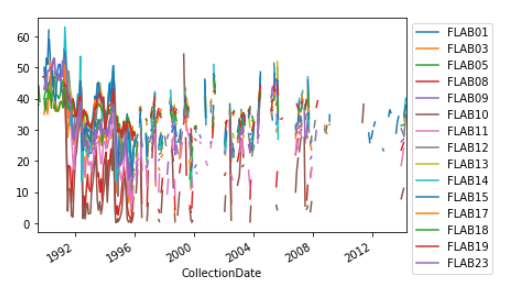



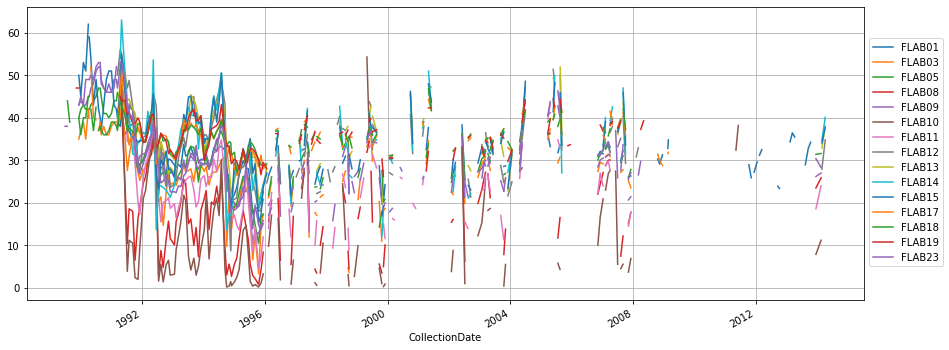

In [6]:
salt.plot(figsize=(15,6), grid=True)
plt.legend(loc="lower center", bbox_to_anchor=(1.05, .1), ncol=1)

<font size=4> The data was collected at different times of the month so it throws off our plots.  
 
## Use the dataframe property [resample('M').mean()](http://benalexkeen.com/resampling-time-series-data-with-pandas/).This will resample the data by a monthly average.   How Much does this reduce the data set?

  

In [7]:
saltrs = salt.resample('M').mean()
print("The resample took the original data set of 596 records down to 299.","The resampled data set shape:", saltrs.shape)

The resample took the original data set of 596 records down to 299. The resampled data set shape: (299, 15)


## If you check you still get a bunch of NANs.  Use [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) to get rid of all ROWS with Nan's in them.  Ho Much does this reduce the data set?

In [8]:
saltrs.head()

Station ID,FLAB01,FLAB03,FLAB05,FLAB08,FLAB09,FLAB10,FLAB11,FLAB12,FLAB13,FLAB14,FLAB15,FLAB17,FLAB18,FLAB19,FLAB23
CollectionDate,,,,,,,,,,,,,,,
1989-06-30,NaN,NaN,34.0,36.0,38.0,NaN,NaN,NaN,52.0,NaN,57.0,42.0,44.0,46.0,38.0
1989-07-31,NaN,NaN,38.0,26.0,38.0,NaN,NaN,NaN,54.0,NaN,50.0,40.0,44.0,44.0,38.0
1989-08-31,NaN,NaN,38.0,18.0,39.0,NaN,NaN,NaN,52.0,NaN,44.0,37.0,39.0,44.0,39.0
1989-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
salty = saltrs.dropna()
salty.head()

Station ID,FLAB01,FLAB03,FLAB05,FLAB08,FLAB09,FLAB10,FLAB11,FLAB12,FLAB13,FLAB14,FLAB15,FLAB17,FLAB18,FLAB19,FLAB23
CollectionDate,,,,,,,,,,,,,,,
1991-04-30,38.00,40.0,44.00,47.0,52.00,47.00,53.0,56.0,49.00,54.00,47.0,45.0,44.00,45.00,53.0
1991-05-31,41.00,43.0,48.00,43.0,53.00,50.00,53.0,55.0,52.00,63.00,55.0,51.0,43.00,44.00,53.0
1991-06-30,36.20,35.5,42.50,24.4,46.20,22.00,46.5,49.8,50.90,50.60,46.6,40.6,40.60,44.10,48.5
1991-07-31,37.55,29.2,39.55,14.5,40.75,7.55,34.3,47.9,44.25,41.45,37.6,35.5,37.25,41.05,41.7
1991-09-30,38.40,36.3,41.80,18.0,41.80,10.50,36.7,42.7,42.10,31.50,35.4,36.5,36.80,38.60,39.9


In [10]:
print("Dropping null records dropped the resampled data set of 299 records down to 229 rows.","The new data set shape:", salty.shape)

Dropping null records dropped the resampled data set of 299 records down to 229 rows. The new data set shape: (229, 15)


## Now let's check for correlation using the dataframe attribute [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html).  __In particular what did you get for the correlation between FLAB23 and FLAB11 ?__ Use plt.matshow to plot the correlation matrix.

In [11]:
salty.corr()

Station ID,FLAB01,FLAB03,FLAB05,FLAB08,FLAB09,FLAB10,FLAB11,FLAB12,FLAB13,FLAB14,FLAB15,FLAB17,FLAB18,FLAB19,FLAB23
Station ID,,,,,,,,,,,,,,,
FLAB01,1.000000,0.883028,0.862493,0.795271,0.810663,0.742812,0.818645,0.768269,0.737579,0.683248,0.713135,0.662425,0.644609,0.685580,0.791610
FLAB03,0.883028,1.000000,0.828934,0.868321,0.799161,0.785553,0.839682,0.780842,0.700965,0.715403,0.710584,0.636467,0.588895,0.611719,0.763983
FLAB05,0.862493,0.828934,1.000000,0.746958,0.917825,0.678962,0.865440,0.840474,0.800942,0.709890,0.750571,0.696531,0.675976,0.759694,0.901380
FLAB08,0.795271,0.868321,0.746958,1.000000,0.707413,0.923879,0.790884,0.700566,0.621342,0.701135,0.665343,0.551729,0.522526,0.523906,0.679145
FLAB09,0.810663,0.799161,0.917825,0.707413,1.000000,0.638216,0.869082,0.817841,0.774058,0.669406,0.711365,0.668250,0.643680,0.740352,0.920050
FLAB10,0.742812,0.785553,0.678962,0.923879,0.638216,1.000000,0.768566,0.684160,0.605748,0.672421,0.632811,0.543933,0.514607,0.511723,0.643345
FLAB11,0.818645,0.839682,0.865440,0.790884,0.869082,0.768566,1.000000,0.866499,0.806646,0.752488,0.773767,0.659428,0.632102,0.707303,0.933973
FLAB12,0.768269,0.780842,0.840474,0.700566,0.817841,0.684160,0.866499,1.000000,0.919997,0.836417,0.854892,0.688537,0.664813,0.769295,0.858985
FLAB13,0.737579,0.700965,0.800942,0.621342,0.774058,0.605748,0.806646,0.919997,1.000000,0.872260,0.918248,0.786990,0.780700,0.878922,0.830024


In [12]:
print('The correlation between FLAB23 and FLAB11 is 0.933973')

The correlation between FLAB23 and FLAB11 is 0.933973


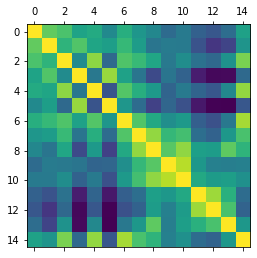

In [13]:
plt.matshow(salty.corr())
plt.show()

## Now use Scikit_learn sklearn.linear_model.LinearRegression() to fit the data  and plot it.  Make sure to give the model with the coefficients.  The examples from  Week1.ipynb should be a lot of help. You probably need to convert from a data frame to an array using np.c_  to use sklearn.

-6.443013617727573 1.0808615154334005


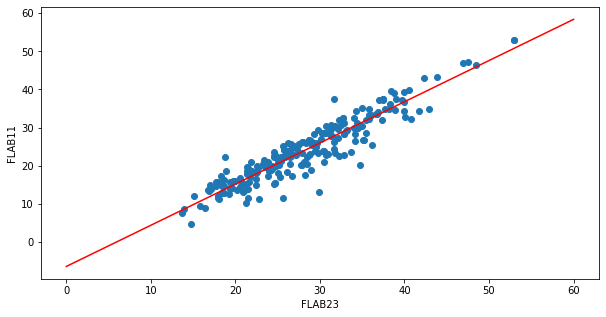

In [14]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

saltarray = np.array(salty)
x=saltarray.T[14]
x=x.reshape(229,1)
y=saltarray.T[6]
y=y.reshape(229,1) 


reg=linear_model.LinearRegression()
plt.figure(figsize=(10,5))
reg.fit (x,y)
a=reg.intercept_[0] 
b=reg.coef_[0][0]
line=np.linspace(0,60, 100)
plt.plot(line, a + b*line, "r") #h(x)=a+bx
plt.scatter(x,y)
plt.xlabel("FLAB23")
plt.ylabel("FLAB11")
print(a,b)

In [15]:
#R^2
reg.score(x,y)

0.8723046800108436

 <font size=4>My graph looked like this. 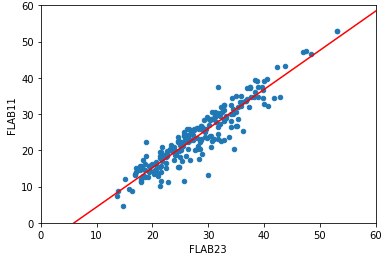

<font size=4>Looking at the compiled data before I removed the Nans,we see that FLAB11 has a lot of missing data. 
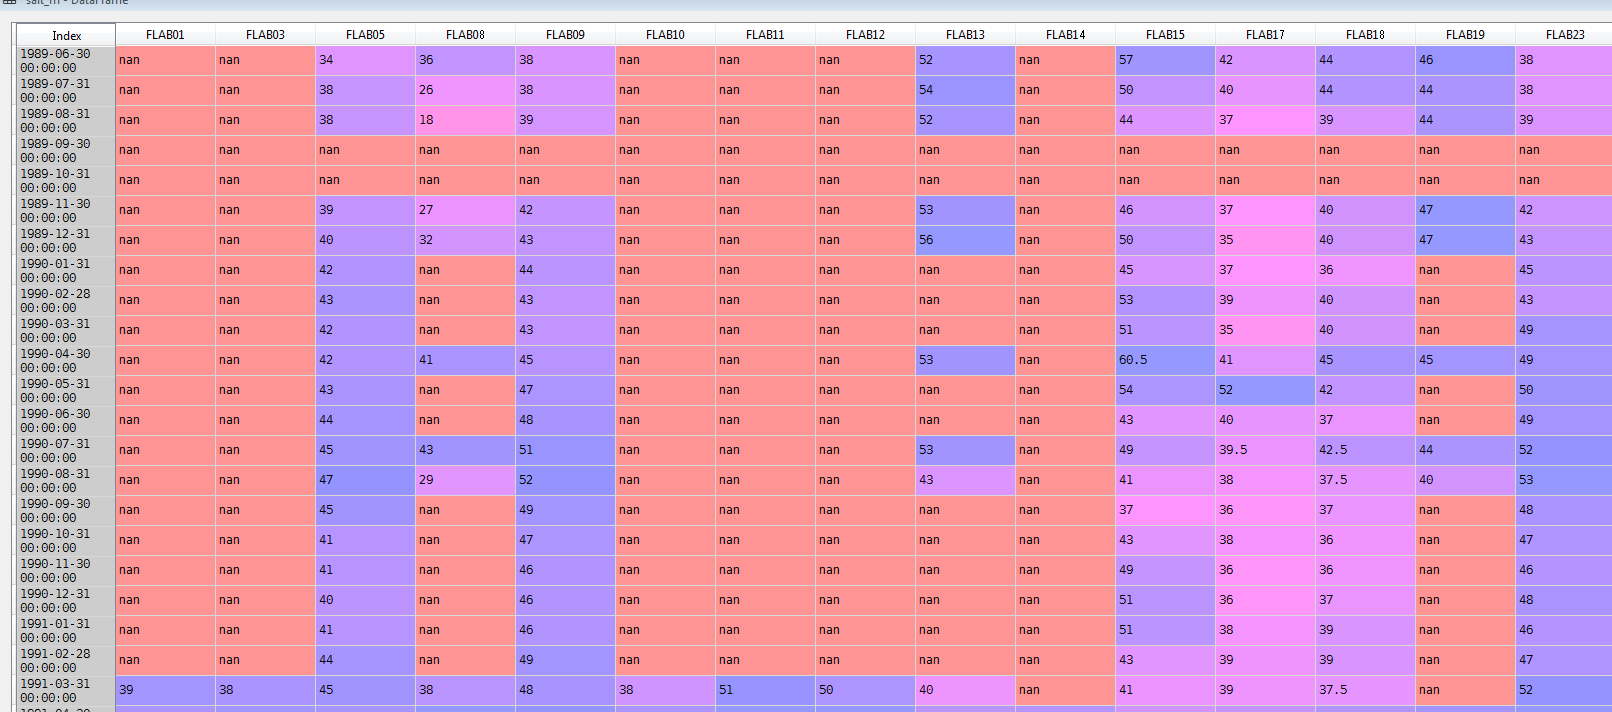  

## Use the regression to estimate the salt concentration for the first 21 months of the data set.  You can use 40 and 41 as values for the NANs in month 4 and 5 of FLAB23. Plot the results .

<font size=4>My plot looked like this
    
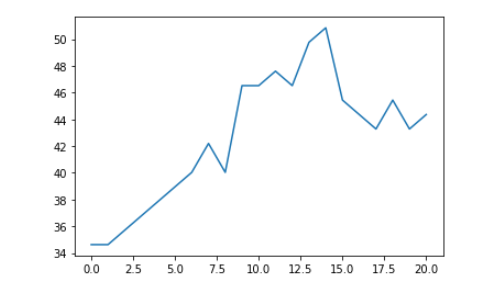

In [16]:
saltrs.sort_index()
saltrs.at['1989-09-30', 'FLAB23'] = 40
saltrs.at['1989-10-31', 'FLAB23'] = 41
saltrs.head(10)

Station ID,FLAB01,FLAB03,FLAB05,FLAB08,FLAB09,FLAB10,FLAB11,FLAB12,FLAB13,FLAB14,FLAB15,FLAB17,FLAB18,FLAB19,FLAB23
CollectionDate,,,,,,,,,,,,,,,
1989-06-30,NaN,NaN,34.0,36.0,38.0,NaN,NaN,NaN,52.0,NaN,57.0,42.0,44.0,46.0,38.0
1989-07-31,NaN,NaN,38.0,26.0,38.0,NaN,NaN,NaN,54.0,NaN,50.0,40.0,44.0,44.0,38.0
1989-08-31,NaN,NaN,38.0,18.0,39.0,NaN,NaN,NaN,52.0,NaN,44.0,37.0,39.0,44.0,39.0
1989-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
1989-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0
1989-11-30,NaN,NaN,39.0,27.0,42.0,NaN,NaN,NaN,53.0,NaN,46.0,37.0,40.0,47.0,42.0
1989-12-31,NaN,NaN,40.0,32.0,43.0,NaN,NaN,NaN,56.0,NaN,50.0,35.0,40.0,47.0,43.0
1990-01-31,NaN,NaN,42.0,NaN,44.0,NaN,NaN,NaN,NaN,NaN,45.0,37.0,36.0,NaN,45.0
1990-02-28,NaN,NaN,43.0,NaN,43.0,NaN,NaN,NaN,NaN,NaN,53.0,39.0,40.0,NaN,43.0


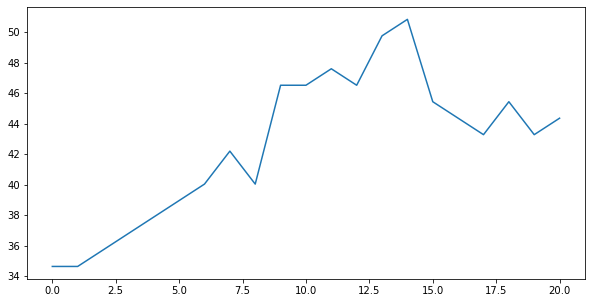

In [17]:
saltfinal = np.array(saltrs)
saltfinal
saltp = saltfinal.T[14]
saltp = saltp.reshape(-1,1)
#saltp
salt_concentration = saltp[:21]
#salt_concentration
salt_concentration = salt_concentration.reshape(-1,1)
#salt_concentration
salt_fl11 = reg.predict(salt_concentration)
#salt_fl11
plt.figure(figsize=(10,5))
plt.plot(salt_fl11)